**`FAKE WEBSITE DETECTOR`**


BY : Inzish Khan (21L-6264) ,Javeria Pervaiz (21L-6280) ,Farzeen Imran (21L-5631) and Shumail Zehra (21L-6277)

 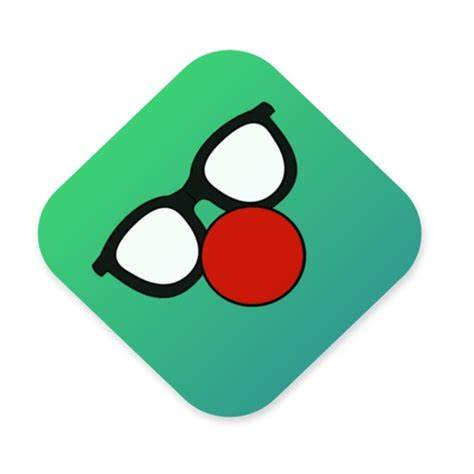

# Loading Dataset ⚡

In [ ]:
#Fake website Detector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [ ]:
df.type.unique()
df.type.value_counts()

,count
type,
benign,428103
defacement,96457
phishing,94111
malware,32520


Type Class Label Description:  ⚡

1.   **Benign** :: URLs refer to safe-to-browse websites

2.  **Defacement** :: URLs which created by
 hackers with the intent to replace the original hosted website
 with its own content

3.  **Phishing** :: URLs aim to steal sensitive information such as login
 credentials and financial data

4.  **Malware** ::  URLs inject harmful software into a victim’s
 system upon accessing the URL





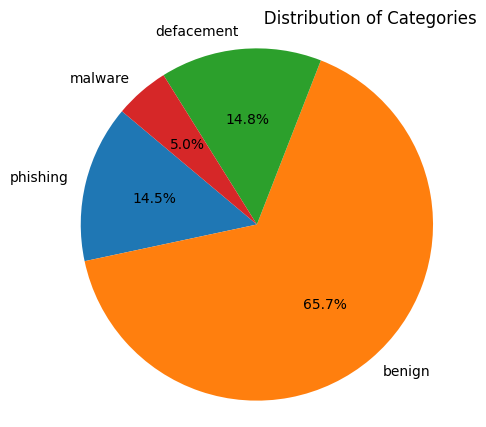

In [ ]:
#Creating Pie Chart for the Type Label
import matplotlib.pyplot as plt

labels = ['phishing', 'benign', 'defacement', 'malware']

counts = [94111, 428103, 96457, 32520]
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('                                           Distribution of Categories')
plt.axis('equal')
plt.show()

In [ ]:
from wordcloud import WordCloud
def generate_word_cloud(category):
    # Filter the DataFrame for the specified category
    category_df = df[df['type'] == category]

    # Concatenate all text data associated with the category into a single string
    text = ' '.join(category_df['url'])  # Assuming 'url' is the column containing the text data

    # Generate word cloud
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(category)
    plt.axis("off")
    plt.show()

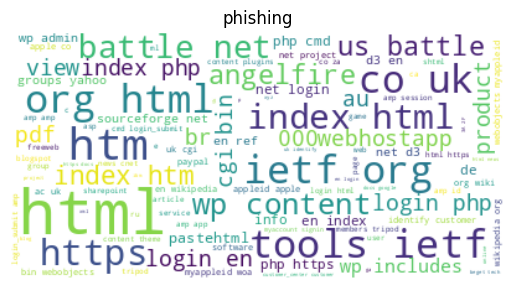

In [ ]:
generate_word_cloud('phishing')
#Phishinh URLS shows that often feature tokens like tools, ietf, www, index, and battle are used to
#trick users by imitating legitimate URLs

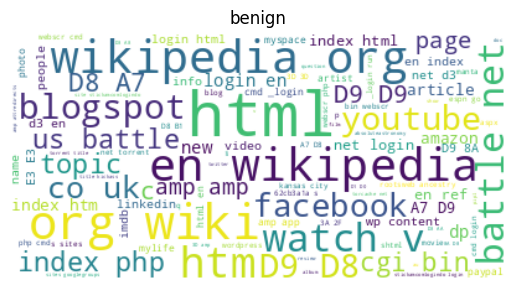

In [ ]:
generate_word_cloud('benign')
#Benign URLs tend to contain commonly used tokens like HTML, com, org, and wiki, which are frequent.

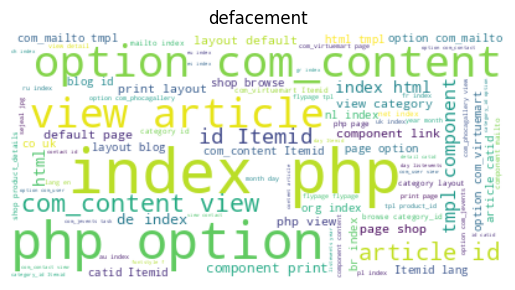

In [ ]:
generate_word_cloud('defacement')
# Defacement URLS which aim to modify the code of original websites and tend to have more frequent
# development-related terms such as php, index,itemid,option,https,etc

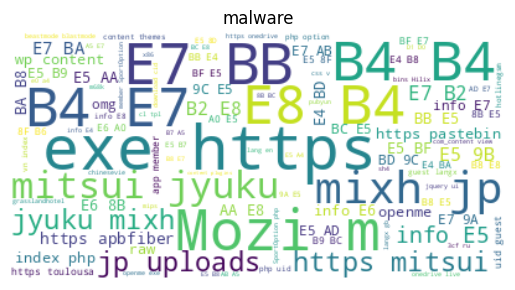

In [ ]:
generate_word_cloud('malware')
#Malware URLs frequently include high-frequency tokens like exe, E7,BB, andMOZI,which are utilized to inject
#users’systems with trojans in the form of executable files

# **Pre-Processing** 🐋

In [ ]:
#calculating number of duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate entries: ", duplicates)

Number of duplicate entries:  10066


In [ ]:
#removing the duplicates
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Calculating the number of nulls
df.isnull().sum()

,0
url,0
type,0


In [ ]:
#dropping null values
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641125 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     641125 non-null  object
 1   type    641125 non-null  object
dtypes: object(2)
memory usage: 14.7+ MB


In [ ]:
#converting categorical values into numerical values
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [ ]:
df

,url,type
0,br-icloud.com.br,3
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3
651188,www.gamespot.com/xbox360/action/deadspace/,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3


In [ ]:
df['type'].unique()

array([3, 0, 1, 2])

# Extracting Content 💥

In [ ]:
!pip install python-whois

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 2.0 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import whois
import re
from textblob import TextBlob
from urllib.parse import urlparse
from sklearn.feature_extraction.text import CountVectorizer
import joblib

def extract_content(url):
    try:
        response = requests.get(url, timeout=10)  # Timeout set to 10 seconds
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extract text content
        text_content = soup.get_text()
        return text_content
    except Exception as e:
        print("Error:", e)
        return None
# Function to extract domain features
def extract_domain_features(url):
    try:
        domain = urlparse(url).netloc
        # Extract domain information using whois
        domain_info = whois.whois(domain)
        # Extract domain creation date
        creation_date = domain_info.creation_date
        # Extract domain expiration date
        expiration_date = domain_info.expiration_date
        # Extract domain registrar
        registrar = domain_info.registrar
        return creation_date, expiration_date, registrar
    except Exception as e:
        print("Error:", e)
        return None, None, None

# Function to extract language and sentiment features
def extract_language_sentiment_features(text_content):
    try:
        # Use TextBlob to analyze language and sentiment
        blob = TextBlob(text_content)
        language = blob.detect_language()
        sentiment = blob.sentiment.polarity
        return language, sentiment
    except Exception as e:
        print("Error:", e)
        return None, None

# Function to classify URL based on features
def classify_url(url):
    text_content = extract_content(url)
    if not text_content:
        return "Error: Unable to extract content"

    creation_date, expiration_date, registrar = extract_domain_features(url)

    # Extract language and sentiment features
    language, sentiment = extract_language_sentiment_features(text_content)

    if "malware" in text_content:
        return "malware"
    elif "phishing" in text_content:
        return "phishing"
    elif "defacement" in text_content:
        return "defacement"
    else:
        return "benign"

url = "https://mp3raid.com/music/krizz_kaliko.html"
classification = classify_url(url)
print("URL Classification:", classification)

Error: HTTP Error 400: Bad Request
URL Classification: benign


# **Feature Extraction / Engineering** 🎯

**Having IP Address**



*   *It checks if the an IP address is placed in the place of the domain name in the URL. as it is common technique used by cyberattackers to conceal their identities*



In [ ]:
from urllib.parse import urlparse
import pandas as pd
import re

def contains_ip_address(url):
    # Extracting the domain part of the URL
    domain = urlparse(url).netloc or urlparse(url).path
    ip_pattern = re.compile(r'(\\d{1,3}\\.){3}\\d{1,3}')
    # Searching for the pattern in the domain
    if ip_pattern.search(domain):
        return 1 #True
    else:
        return 0 #False

df['contains_ip'] = df['url'].apply(contains_ip_address)

In [ ]:
df

,url,type,contains_ip
0,br-icloud.com.br,3,0
1,mp3raid.com/music/krizz_kaliko.html,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0
4,http://adventure-nicaragua.net/index.php?optio...,1,0
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0


**Abnormal URLS**



*   *Legitimate websites typically have a consistent identity in
their URL, so a lack of this consistency may indicate a potentially malicious website.*



In [ ]:
from urllib.parse import urlparse
import re
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [ ]:
df

,url,type,contains_ip,abnormal_url
0,br-icloud.com.br,3,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0


**Google Index**



*   *It checks if the URL is indexed by Google’s search system or not, as legitimate websites are typically indexed by search engines*



In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index
0,br-icloud.com.br,3,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1


**Count dot**



*    *It identifies the number of subdomains in a URL, as phishing websites tend to use multiple subdomains separated by
 dots.A URL with more than three dots is considered to have a higher possibility of being a malicious website.*



In [ ]:
def count_dots(url):
    # Extracting the domain from the URL
    domain = urlparse(url).netloc
    # Counting the number of dots in the domain
    return domain.count('.')


df['count_dots'] = df['url'].apply(count_dots)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots
0,br-icloud.com.br,3,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0


**Count www**



*   *It identifies URLs with zero or multiple “www” subdomains, as safe websites have only one “www” in their URL.*



In [ ]:
def count_www_subdomains(url):
    # Extracting the domain from the URL
    domain = urlparse(url).netloc
    # Counting the number of 'www' in the domain
    return domain.count('www.')

df['count_www'] = df['url'].apply(count_www_subdomains)


In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www
0,br-icloud.com.br,3,0,0,1,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0
...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0


**Count @**



*   *This looks for the “@” symbol in the URL,which typically indicates the start of an email address and can be used to
ignore everything preceding it.*



In [ ]:
def count_at_symbols(url):
    return url.count('@')

df['count_at'] = df['url'].apply(count_at_symbols)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at
0,br-icloud.com.br,3,0,0,1,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0


**Count directories**



*   *It looks for the existence of many directories in the URL, as this often specifies a suspicious website.*



In [ ]:
def count_directories(url):
    path = urlparse(url).path
    directories = path.lstrip('/').split('/')
    return len([dir for dir in directories if dir])


df['count_dir'] = df['url'].apply(count_directories)


In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir
0,br-icloud.com.br,3,0,0,1,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3


**Count Embed Domain**



*   *It counts the number of embedded domains in the URL by inspecting the causation of ”//” in the URL.*



In [ ]:
def count_embedded_domains(url):
    count = url.count('//')
    if url.startswith('http://') or url.startswith('https://'):
        count -= 1
    return count

df['count_embed_domain'] = df['url'].apply(count_embedded_domains)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0


**Doubtful Words**



*   *This identifies the presence of frequently occurring questionable words in the URL, like “login”,“PayPal”, “update” and “bank”*

*   *URLs with these words are considered to have a higher probability of being malicious.*




In [ ]:
doubtful_words = ['login', 'paypal', 'update', 'bank']

def contains_doubtful_words(url):
    return int(any(word in url.lower() for word in doubtful_words))

df['contains_doubtful_words'] = df['url'].apply(contains_doubtful_words)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0


**Short URLs**



*  *It identifies URLs that use URL shortening systems like goo.gl,bit.ly ,orgo2l.ink , as these services are often used by
attackers to conceal the true destination of the URL.*



In [ ]:
import re

def is_short_url(url):
    pattern = re.compile(r'^(?:http://|https://)?(?:www\.)?(\w+\.\w{2,3})/(?:\w+)$')
    match = pattern.match(url)
    if match and not match.group(1).lower() in ['www.google.com', 'www.facebook.com', 'www.youtube.com']:
        return 1 #True
    return 0  #False

df['is_short_url'] = df['url'].apply(is_short_url)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0


**Count https**



*   *It looks for the existence or absence of the HTTPS protocol in the URL,as most malicious URLs donot use HTTPS*


In [ ]:
import pandas as pd

def has_https(url):
    return int(url.startswith('https://'))

df['has_https'] = df['url'].apply(has_https)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url,has_https
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0,0


**Count http**



* *It counts the number of HTTP in the URL, as phishing websites tend to have more than one HTTP in their URL.*



In [ ]:
def count_http(url):
    return url.lower().count('http')

df['count_http'] = df['url'].apply(count_http)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url,has_https,count_http
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0,0,0


**Count %**



*  *It counts the number of “%”s in the URL,as malicious URLs tend to have more spaces in their URL than safe sites.*



In [ ]:
def count_percent(url):
    return url.count('%')

df['count_percent'] = df['url'].apply(count_percent)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url,has_https,count_http,count_percent
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0,0,0,0


**Count ?**



*   *It identifies the existence of the “?” symbol in the URLs, which indicates a query string which holds data to be transferred to the server*



In [ ]:
def count_question_mark(url):
    return url.count('?')

df['count_question_mark'] = df['url'].apply(count_question_mark)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url,has_https,count_http,count_percent,count_question_mark
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0,0,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0,0,0,0,0


**Count -**



*   *It identifies the presence of dashes in the URL,which phishers or cyber criminals often add to the suffix or prefix of a brand name to make it appear authentic*


In [ ]:
def count_hyphens(url):
    return url.count('-')

df['count_hyphens'] = df['url'].apply(count_hyphens)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url,has_https,count_http,count_percent,count_question_mark,count_hyphens
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0,0,1,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,2
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0


**Count =**



*  *This identifies the presence of “=” in the URL,which indicates the sending of variable values from one page to another.URLs with more “=" symbols are considered to be riskier.*



In [ ]:
def count_equals(url):
    return url.count('=')

df['count_equals'] = df['url'].apply(count_equals)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url,has_https,count_http,count_percent,count_question_mark,count_hyphens,count_equals
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0,0,1,0,1,1,4
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,2,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0


**URL Length**



*  *It looks at the average length of the safe URLs .Attackers often use longer URLs to conceal the domain name.*



In [ ]:
def url_length(url):
    return len(url)

df['url_length'] = df['url'].apply(url_length)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url,has_https,count_http,count_percent,count_question_mark,count_hyphens,count_equals,url_length
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,16
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,35
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,31
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0,0,1,0,1,1,4,88
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,3,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,2,0,44
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,42
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,45


**Hostname Length**



*   *It looks at the size of the hostname in the URL, as this is an important indicator of potentially malicious websites.*



In [ ]:
import pandas as pd
from urllib.parse import urlparse

def hostname_length(url):
    # Parsing the URL to extract the hostname
    hostname = urlparse(url).hostname
    # Return the length of the hostname
    return len(hostname) if hostname else 0

df['hostname_length'] = df['url'].apply(hostname_length)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,contains_doubtful_words,is_short_url,has_https,count_http,count_percent,count_question_mark,count_hyphens,count_equals,url_length,hostname_length
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,3,235,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,39,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,2,0,44,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,42,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,45,0


**First Directory Length**



*   *It determines the size of the first directory in the URL,which can be used to identify potentially suspicious websites.*



In [ ]:
def first_directory_length(url):
    path = urlparse(url).path
    # Splitting the path by '/' and filter out empty strings
    directories = [dir for dir in path.split('/') if dir]
    # Return the length of the first directory if it exists
    return len(directories[0]) if directories else 0


df['first_directory_length'] = df['url'].apply(first_directory_length)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,...,is_short_url,has_https,count_http,count_percent,count_question_mark,count_hyphens,count_equals,url_length,hostname_length,first_directory_length
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,16,0,16
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,...,0,0,0,0,0,0,0,35,0,11
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,...,0,0,0,0,0,0,0,31,0,14
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,...,0,0,1,0,1,1,4,88,21,9
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,...,0,0,1,0,1,1,3,235,23,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,...,0,0,0,0,0,0,0,39,0,15
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,...,0,0,0,0,0,2,0,44,0,18
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,...,0,0,0,0,0,0,0,42,0,16
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,...,0,0,0,0,0,0,0,45,0,16


**Length of Top Level Domains**



*   *It looks at the size of the Top Level Domain(TLD). In the URL, as attackers often use long TLDs to create fake
domains that resemble legitimate ones*



In [ ]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from urllib.parse import urlparse
from tld import get_tld

def tld_length(url):
    try:
        # Use the tld library to get the TLD
        tld = get_tld(url, as_object=True).suffix
        # Return the length of the TLD
        return len(tld)
    except:
        # Return 0 if there is an error (e.g., invalid URL)
        return 0
df['tld_length'] = df['url'].apply(tld_length)

In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,...,has_https,count_http,count_percent,count_question_mark,count_hyphens,count_equals,url_length,hostname_length,first_directory_length,tld_length
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,16,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,...,0,0,0,0,0,0,35,0,11,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,...,0,0,0,0,0,0,31,0,14,0
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,...,0,1,0,1,1,4,88,21,9,2
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,...,0,1,0,1,1,3,235,23,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,...,0,0,0,0,0,0,39,0,15,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,...,0,0,0,0,2,0,44,0,18,0
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,...,0,0,0,0,0,0,42,0,16,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,...,0,0,0,0,0,0,45,0,16,0


**Entropy of the URL**


*   *Higher entropy means randomness which means more chance of malicious urls*



In [ ]:
import pandas as pd
import math
from collections import Counter


def url_entropy(url):
    # Counting the frequency of each character in the URL
    char_counts = Counter(url)
    # Calculating the probabilities of each character
    probabilities = [count / len(url) for count in char_counts.values()]
    # Calculating the entropy of the URL
    entropy = -sum(p * math.log(p, 2) for p in probabilities)
    return entropy


df['url_entropy'] = df['url'].apply(url_entropy)


In [ ]:
df

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,...,count_http,count_percent,count_question_mark,count_hyphens,count_equals,url_length,hostname_length,first_directory_length,tld_length,url_entropy
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,...,0,0,0,1,0,16,0,16,0,3.375000
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,...,0,0,0,0,0,35,0,11,0,4.079143
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,...,0,0,0,0,0,31,0,14,0,3.708093
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,...,1,0,1,1,4,88,21,9,2,4.660343
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,...,1,0,1,1,3,235,23,9,3,5.491293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,3,0,0,1,0,0,0,4,0,...,0,0,0,0,0,39,0,15,0,4.355539
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,3,0,0,1,0,0,0,4,0,...,0,0,0,2,0,44,0,18,0,4.243300
651188,www.gamespot.com/xbox360/action/deadspace/,3,0,0,1,0,0,0,4,0,...,0,0,0,0,0,42,0,16,0,4.147921
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),3,0,0,1,0,0,0,3,0,...,0,0,0,0,0,45,0,16,0,4.102313


In [ ]:
# Saving the updated DataFrame back to a CSV file
df.to_csv('updated_dataset.csv', index=False)

In [ ]:
import pandas as pd
df=pd.read_csv("updated_dataset.csv")

In [ ]:
df.head()

,url,type,contains_ip,abnormal_url,google_index,count_dots,count_www,count_at,count_dir,count_embed_domain,...,count_http,count_percent,count_question_mark,count_hyphens,count_equals,url_length,hostname_length,first_directory_length,tld_length,url_entropy
0,br-icloud.com.br,3,0,0,1,0,0,0,1,0,...,0,0,0,1,0,16,0,16,0,3.375000
1,mp3raid.com/music/krizz_kaliko.html,0,0,0,1,0,0,0,3,0,...,0,0,0,0,0,35,0,11,0,4.079143
2,bopsecrets.org/rexroth/cr/1.htm,0,0,0,1,0,0,0,4,0,...,0,0,0,0,0,31,0,14,0,3.708093
3,http://www.garage-pirenne.be/index.php?option=...,1,0,1,1,2,1,0,1,0,...,1,0,1,1,4,88,21,9,2,4.660343
4,http://adventure-nicaragua.net/index.php?optio...,1,0,1,1,1,0,0,1,0,...,1,0,1,1,3,235,23,9,3,5.491293


# **Applying Models**: 👢

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['url', 'type'])  #Excluding url and type columns
y = df['type']  # Target variable


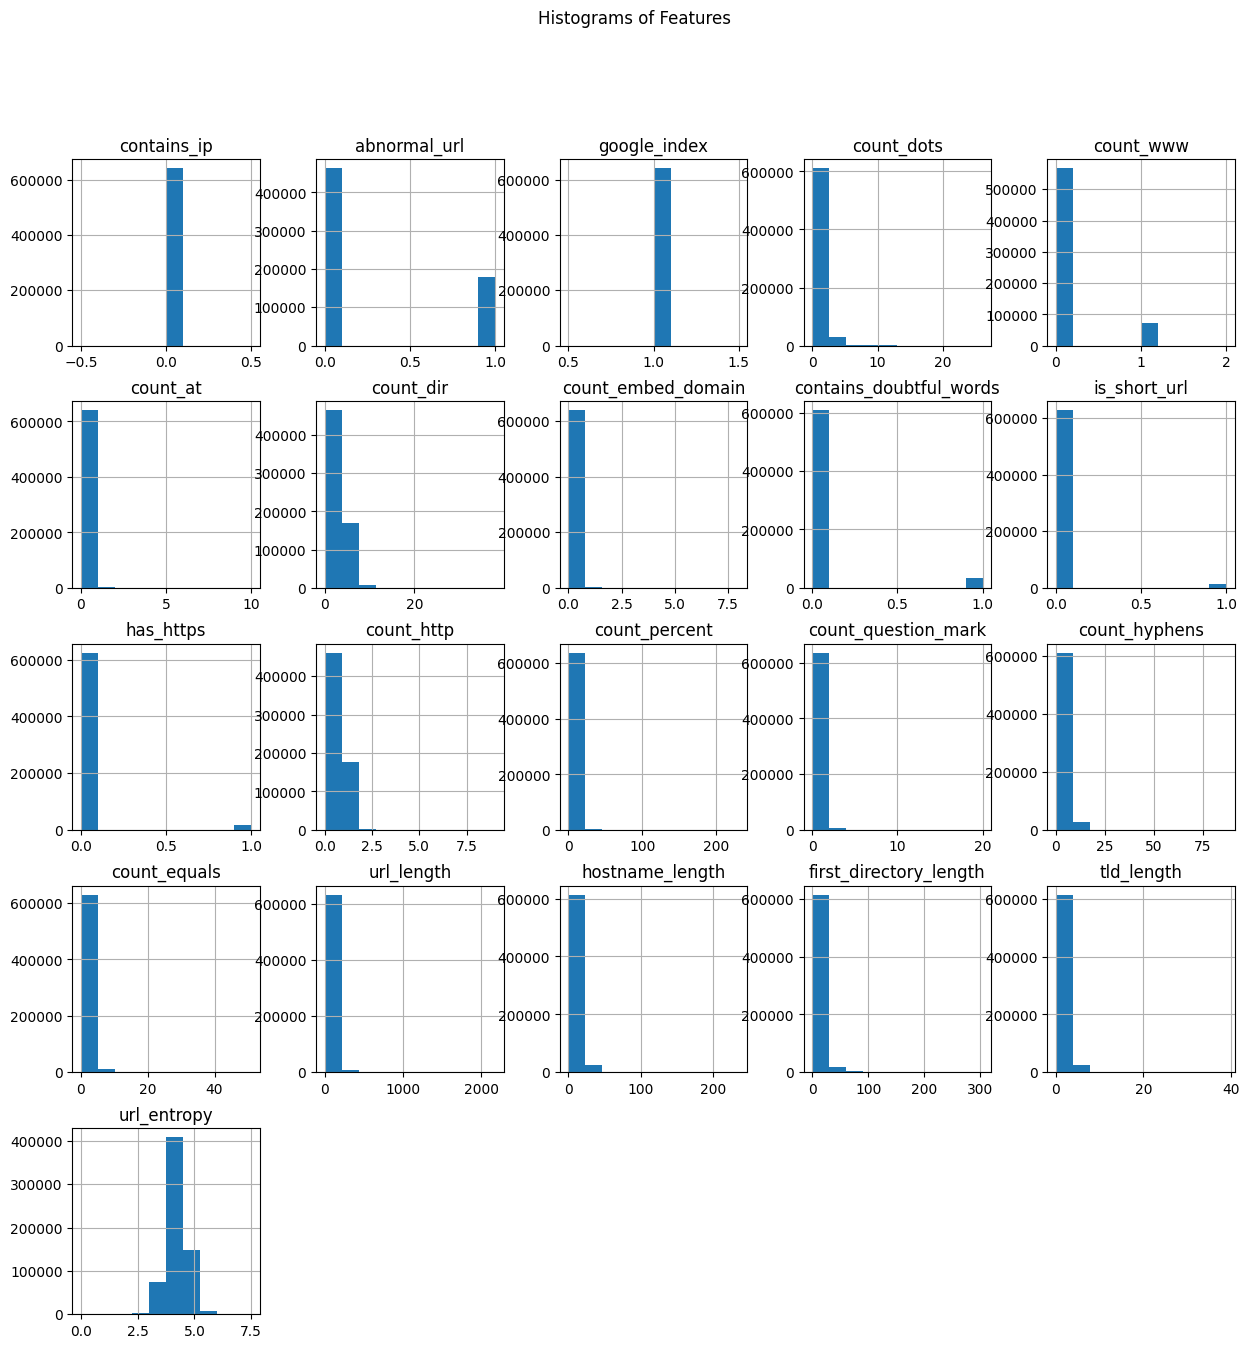

In [ ]:
# Histograms
X.hist(figsize=(15, 15))
plt.suptitle('Histograms of Features')
plt.show()

# **Random Forest** 🐢

In [ ]:
from sklearn.model_selection import train_test_split
# Spllitting the dataset into Train and Split having 80% for Training and 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

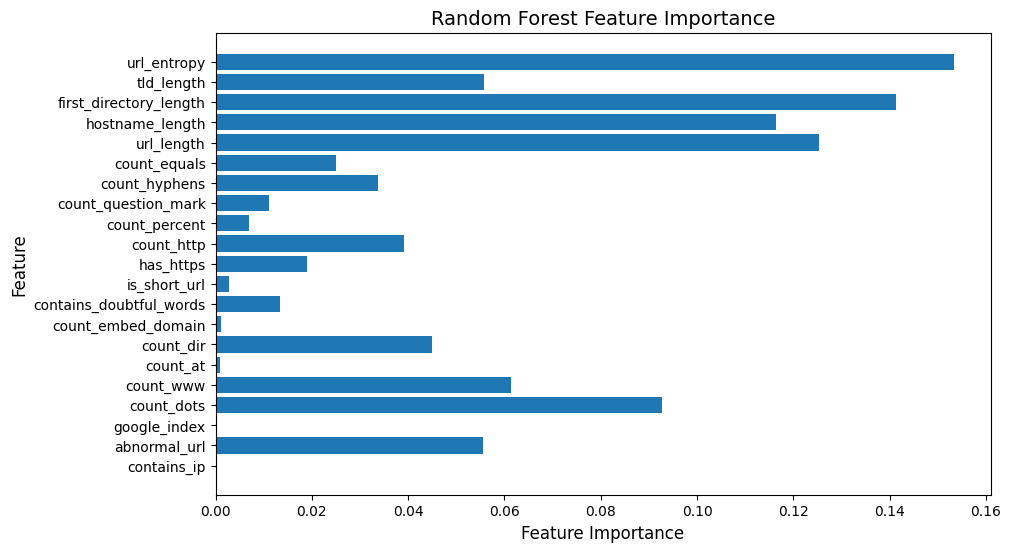

Random Forest Accuracy: 0.9209358549424839


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature names from DataFrame (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, rf_classifier.feature_importances_)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14)
plt.show()

# Predict the target variable on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


### ***Visualizing***

Confusion Matrix

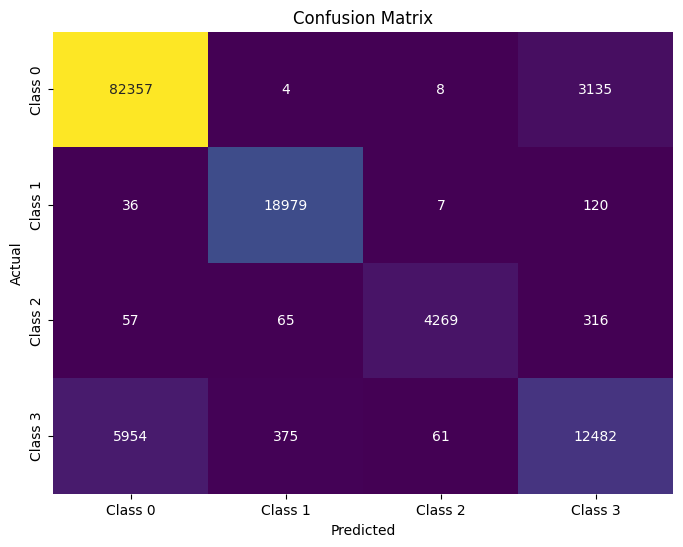

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm1 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='viridis', fmt='g', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Logistic** Regression 🦊

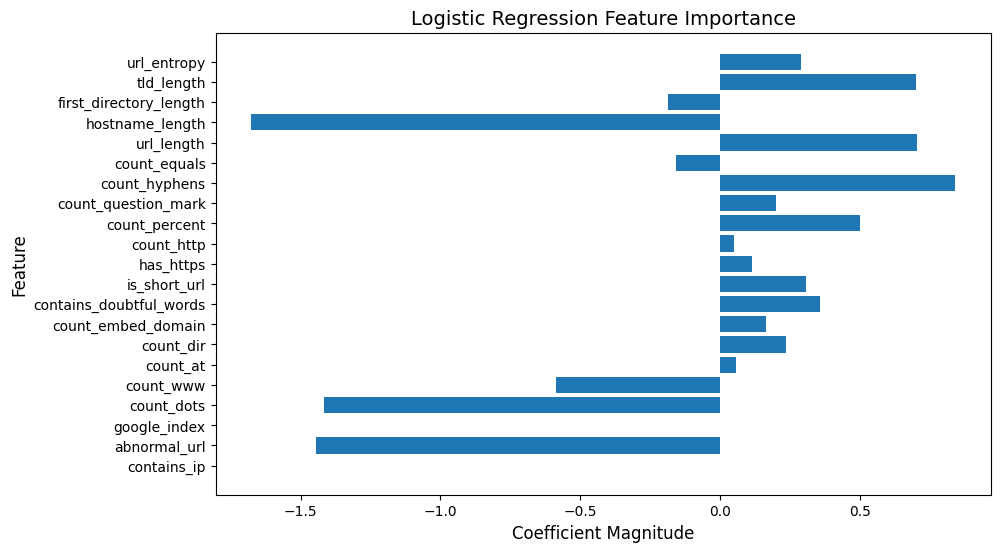

Accuracy: 0.847096899980503


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000)

# Train the classifier
logistic_regression.fit(X_train_scaled, y_train)

# Get feature names from DataFrame (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, logistic_regression.coef_[0])  # Use coefficients as feature importance
plt.xlabel('Coefficient Magnitude', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Logistic Regression Feature Importance', fontsize=14)
plt.show()

# Evaluate the model
y_pred = logistic_regression.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### ***Visualizing***

Confusion Matrix

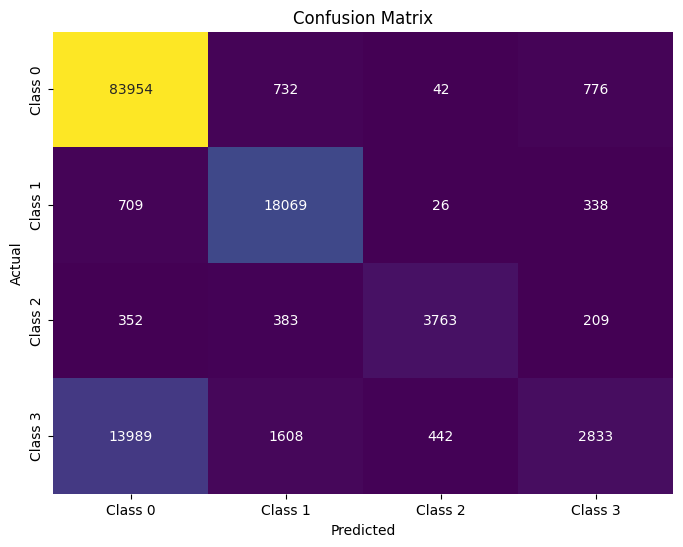

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='viridis', fmt='g', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## MLP 🦄

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', random_state=42)

# Train the classifier
mlp_classifier.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9162799766036265
Precision: 0.9144566720071424
Recall: 0.9162799766036265
F1-score: 0.9075729072042756


### Visualizing

Confusion Matrix

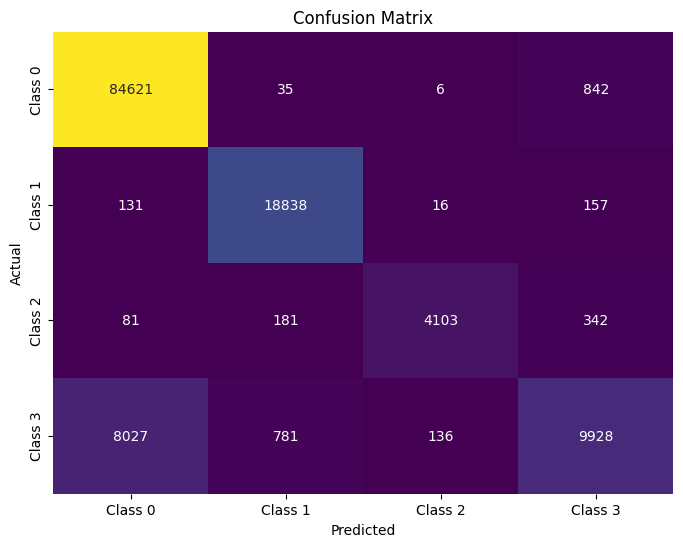

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='viridis', fmt='g', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# CNN 🧰

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Assuming X_train is a DataFrame containing your numerical features
# Convert DataFrame to NumPy array
X_train_array = X_train.values

# Reshape the NumPy array for input to CNN model
X_train_reshaped = X_train_array.reshape(-1, X_train_array.shape[1], 1)

# Define CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])
    return model

# Assuming input_shape is the shape of your input features (e.g., (num_features, 1))
input_shape = (X_train_reshaped.shape[1], 1)  # Shape of each sample in X_train_reshaped

# Create CNN model
cnn_model = create_cnn_model(input_shape)

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Display model summary
print(cnn_model.summary())

# Train the model
history = cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 19, 64)            256       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 9, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 7, 128)            24704     
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 3, 128)            0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 384)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

#  XGBoost ☢

<Figure size 1000x600 with 0 Axes>

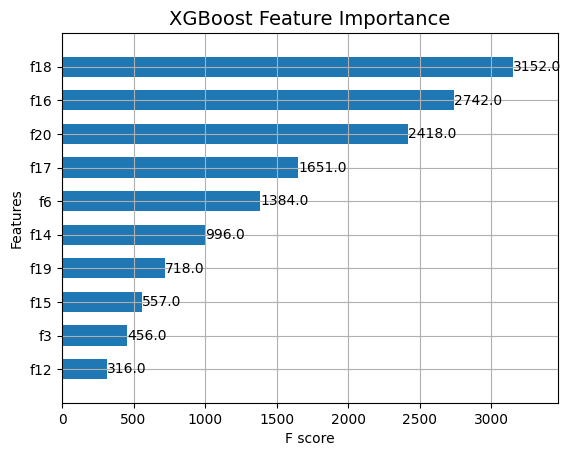

Accuracy: 0.9190173523103919
Precision: 0.916899404263369
Recall: 0.9190173523103919
F1-score: 0.9113359051295727


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance  # Import plot_importance function


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_classifier, importance_type='weight', max_num_features=10, height=0.6)  # Use plot_importance function directly
plt.title('XGBoost Feature Importance', fontsize=14)
plt.show()

# Predict on test set
y_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


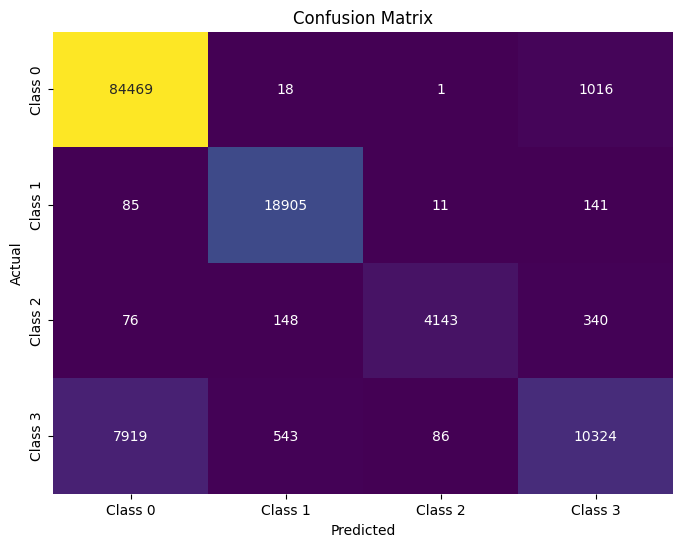

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='viridis', fmt='g', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Decision Trees 🍱

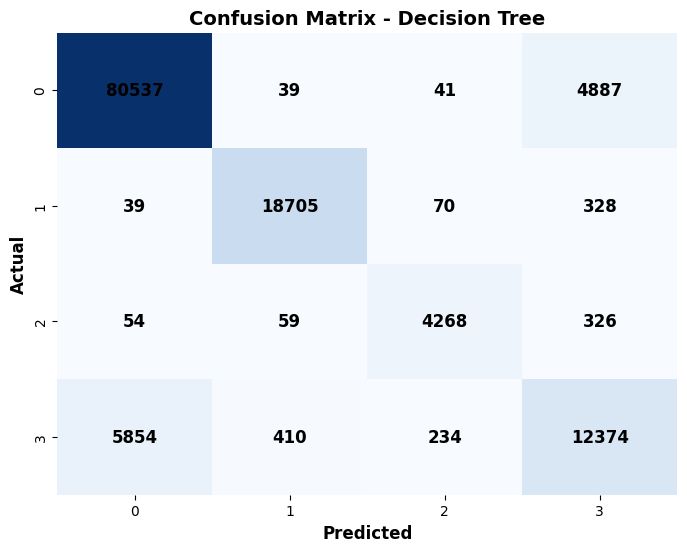

Accuracy: 0.9037551179567167
Precision: 0.9019320863241601
Recall: 0.9037551179567167
F1-score: 0.9027523521531635


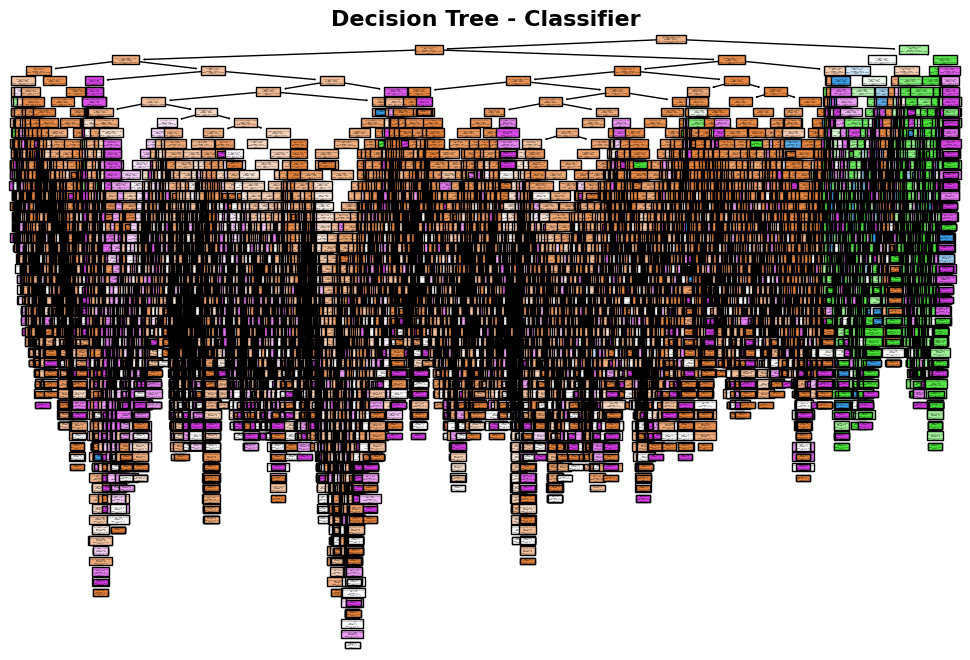

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Output confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=np.unique(y.astype(str)))
plt.title("Decision Tree - Classifier", fontsize=16, fontweight='bold')
plt.show()


# RNN ⚾

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np


# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['url', 'type'])  # Exclude 'url' and 'type' columns
y = df['type']  # Target variable

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Reshape for RNN (batch_size, seq_length, input_size)
# Assuming each feature vector is treated as a sequence of length 1
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # Use the last time step's output
        out = self.fc(out)
        return out

# Hyperparameters
input_size = X_train.shape[2]  # Number of features per time step
hidden_size = 64
output_size = len(np.unique(y))  # Number of classes
num_layers = 1
learning_rate = 0.001
num_epochs = 10
batch_size = 32

# Model, loss, and optimizer
model = RNNModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training
train_loader = torch.utils.data.DataLoader(
    dataset=list(zip(X_train, y_train)),
    batch_size=batch_size,
    shuffle=True
)
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Testing
with torch.no_grad():
    test_outputs = model(X_test)
    predictions = torch.argmax(test_outputs, dim=1)
    accuracy = (predictions == y_test).float().mean()

print(f"Test Accuracy: {accuracy:.4f}")


Epoch [1/10], Loss: 0.3312
Epoch [2/10], Loss: 0.2911
Epoch [3/10], Loss: 0.1710
Epoch [4/10], Loss: 0.4817
Epoch [5/10], Loss: 0.2196
Epoch [6/10], Loss: 0.2551
Epoch [7/10], Loss: 0.9567
Epoch [8/10], Loss: 0.0773
Epoch [9/10], Loss: 0.2456
Epoch [10/10], Loss: 0.3833
Test Accuracy: 0.8808


# RasNet ⛹

In [ ]:
import pandas as pd
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

data = pd.read_csv('updated_dataset.csv')

benign = data[data['type'] == 3]
phishing = data[data['type'] == 2]
defacement = data[data['type'] == 1]
malware = data[data['type'] == 0]

benign_limited = resample(benign, replace=False, n_samples=len(phishing), random_state=42)

balanced_data = pd.concat([benign_limited, phishing, defacement, malware])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

X = balanced_data.iloc[:, 2:].values
y = balanced_data['type'].values

X_reshaped = X.reshape(X.shape[0], 7, 3, 1)

X_reshaped = X_reshaped / X_reshaped.max()

y_one_hot = tf.keras.utils.to_categorical(y, num_classes=4)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

model = Sequential([
    Input(shape=(7, 3, 1)),
    Conv2D(64, kernel_size=(3, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_reshaped, y_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_reshaped, y_one_hot)
print(f'Model Accuracy: {accuracy}')

Epoch 1/10
14267/14267 ━━━━━━━━━━━━━━━━━━━━ 85s 6ms/step - accuracy: 0.8827 - loss: 0.3755 - val_accuracy: 0.9262 - val_loss: 0.2422
Epoch 2/10
14267/14267 ━━━━━━━━━━━━━━━━━━━━ 143s 6ms/step - accuracy: 0.9280 - loss: 0.2408 - val_accuracy: 0.9346 - val_loss: 0.2258
Epoch 3/10
14267/14267 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - accuracy: 0.9348 - loss: 0.2232 - val_accuracy: 0.9408 - val_loss: 0.2090
Epoch 4/10
14267/14267 ━━━━━━━━━━━━━━━━━━━━ 84s 6ms/step - accuracy: 0.9399 - loss: 0.2079 - val_accuracy: 0.9378 - val_loss: 0.2155
Epoch 5/10
14267/14267 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - accuracy: 0.9418 - loss: 0.2004 - val_accuracy: 0.9442 - val_loss: 0.1929
Epoch 6/10
14267/14267 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.9436 - loss: 0.1948 - val_accuracy: 0.9456 - val_loss: 0.1900
Epoch 7/10
14267/14267 ━━━━━━━━━━━━━━━━━━━━ 87s 6ms/step - accuracy: 0.9442 - loss: 0.1930 - val_accuracy: 0.9417 - val_loss: 0.1978
Epoch 8/10
14267/14267 ━━━━━━━━━━━━━━━━━━━━ 84s 6ms/step - accuracy:

In [ ]:
import pandas as pd
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.layers import (
    Dense, Flatten, Conv1D, GlobalMaxPooling1D, Input, Add, Embedding, Concatenate, Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('updated_dataset.csv')

# Balancing the dataset
benign = data[data['type'] == 3]
phishing = data[data['type'] == 2]
defacement = data[data['type'] == 1]
malware = data[data['type'] == 0]

benign_limited = resample(benign, replace=False, n_samples=len(phishing), random_state=42)
balanced_data = pd.concat([benign_limited, phishing, defacement, malware])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Splitting features and labels
X = balanced_data.iloc[:, 2:].values  # Assuming columns 2 and onwards are features
y = balanced_data['type'].values

# Normalizing the input
X = X / X.max()

# One-hot encoding the labels
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=4)

# Character-level embedding
char_input = Input(shape=(X.shape[1],), name='Char_Input')
char_embedding = Embedding(input_dim=1000, output_dim=128, name='Char_Embedding')(char_input)

# Word-level embedding
word_embedding = Embedding(input_dim=1000, output_dim=128, name='Word_Embedding')(char_input)

# Residual Block
def residual_block(input_layer, filters):
    conv1 = Conv1D(filters, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters, kernel_size=3, activation='relu', padding='same')(conv1)
    shortcut = Conv1D(filters, kernel_size=1, padding='same')(input_layer)
    output = Add()([conv2, shortcut])
    return output

# Residual Layers for both embeddings
char_residual = residual_block(char_embedding, 64)
word_residual = residual_block(word_embedding, 64)

# Concatenate character-level and word-level features
combined = Concatenate()([GlobalMaxPooling1D()(char_residual), GlobalMaxPooling1D()(word_residual)])

# Dense layers
dense_layer = Dense(256, activation='relu')(combined)
dense_layer = Dropout(0.5)(dense_layer)
dense_layer = Dense(128, activation='relu')(dense_layer)
output_layer = Dense(4, activation='softmax')(dense_layer)

# Define the model
model = Model(inputs=char_input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X, y_one_hot)
print(f'RasNet Model Accuracy: {accuracy}')


Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7618 - loss: 0.7445 - val_accuracy: 0.7713 - val_loss: 0.7093
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.7669 - loss: 0.6894 - val_accuracy: 0.7713 - val_loss: 0.6677
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7690 - loss: 0.6904 - val_accuracy: 0.7713 - val_loss: 0.6683
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7665 - loss: 0.6889 - val_accuracy: 0.7713 - val_loss: 0.6703
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7692 - loss: 0.6808 - val_accuracy: 0.7713 - val_loss: 0.6711
Epoch 6/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7644 - loss: 0.6916 - val_accuracy: 0.7713 - val_loss: 0.6677
Epoch 7/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7663 - loss: 0.6917 - val_accuracy: 0.7713 - val_loss: 0.6675
Epoch 8/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7708 - loss: 0.6725 - val_a

513/513 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step


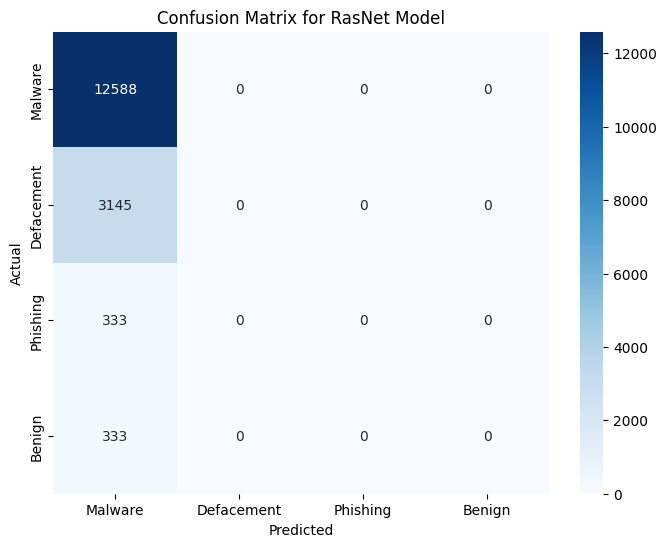

Classification Report:

              precision    recall  f1-score   support

     Malware       0.77      1.00      0.87     12588
  Defacement       0.00      0.00      0.00      3145
    Phishing       0.00      0.00      0.00       333
      Benign       0.00      0.00      0.00       333

    accuracy                           0.77     16399
   macro avg       0.19      0.25      0.22     16399
weighted avg       0.59      0.77      0.67     16399



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = model.predict(X)

# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels back to class indices
y_true_classes = np.argmax(y_one_hot, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malware', 'Defacement', 'Phishing', 'Benign'],
            yticklabels=['Malware', 'Defacement', 'Phishing', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RasNet Model')
plt.show()

# Optionally, print a classification report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Malware', 'Defacement', 'Phishing', 'Benign']))


# LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['url', 'type'])  # Excluding 'url' and 'type' columns
y = df['type']  # Target variable

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape data for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (modify for multi-class)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
14025/14025 ━━━━━━━━━━━━━━━━━━━━ 110s 8ms/step - accuracy: 0.6376 - loss: -2731.7937 - val_accuracy: 0.6412 - val_loss: -21694.3809
Epoch 2/20
14025/14025 ━━━━━━━━━━━━━━━━━━━━ 145s 8ms/step - accuracy: 0.6213 - loss: -34138.2383 - val_accuracy: 0.5776 - val_loss: -89124.0625
Epoch 3/20
14025/14025 ━━━━━━━━━━━━━━━━━━━━ 139s 8ms/step - accuracy: 0.5983 - loss: -113130.9609 - val_accuracy: 0.6300 - val_loss: -199398.8906
Epoch 4/20
14025/14025 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - accuracy: 0.5938 - loss: -232608.1406 - val_accuracy: 0.6770 - val_loss: -351490.0625
Epoch 5/20
14025/14025 ━━━━━━━━━━━━━━━━━━━━ 150s 8ms/step - accuracy: 0.5869 - loss: -394454.5938 - val_accuracy: 0.6792 - val_loss: -549485.6250
Epoch 6/20
14025/14025 ━━━━━━━━━━━━━━━━━━━━ 130s 7ms/step - accuracy: 0.5873 - loss: -607779.3125 - val_accuracy: 0.6428 - val_loss: -816614.8750
Epoch 7/20
14025/14025 ━━━━━━━━━━━━━━━━━━━━ 148s 8ms/step - accuracy: 0.6073 - loss: -914452.1875 - val_accuracy: 0.6649 - val_lo

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

In [89]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 1, 128)              │          76,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 384,965 (1.47 MB)

 Trainable params: 128,321 (501.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256,644 (1002.52 KB)

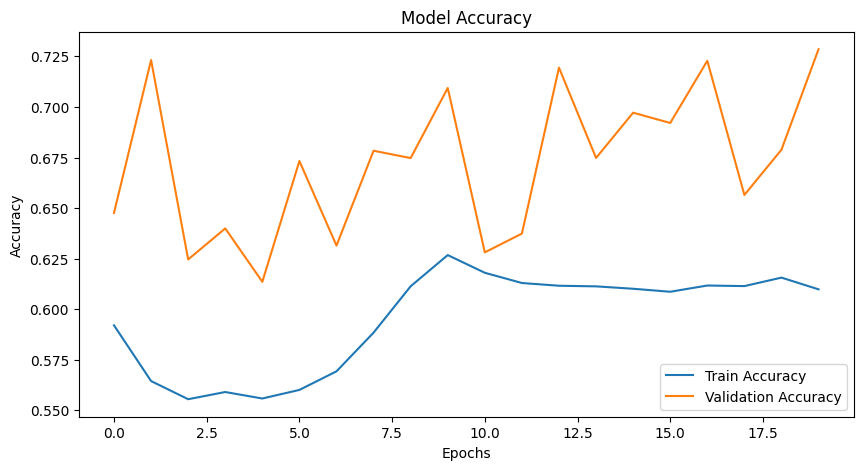

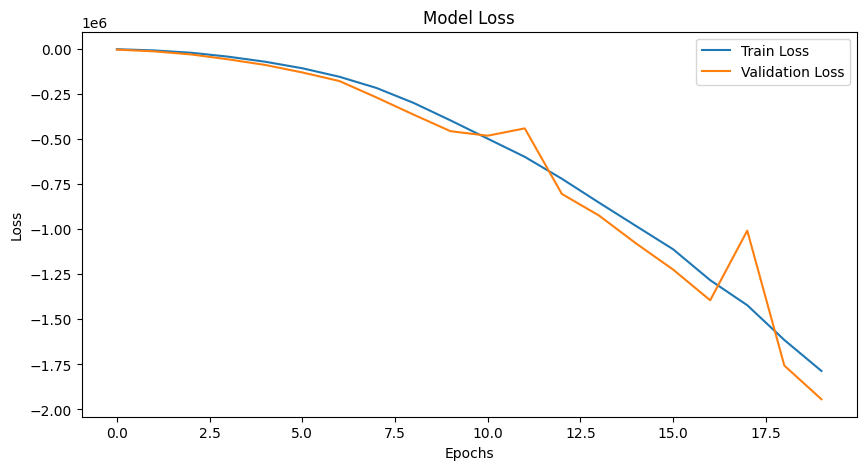

In [ ]:
# Plot accuracy and loss graphs
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3006/3006 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


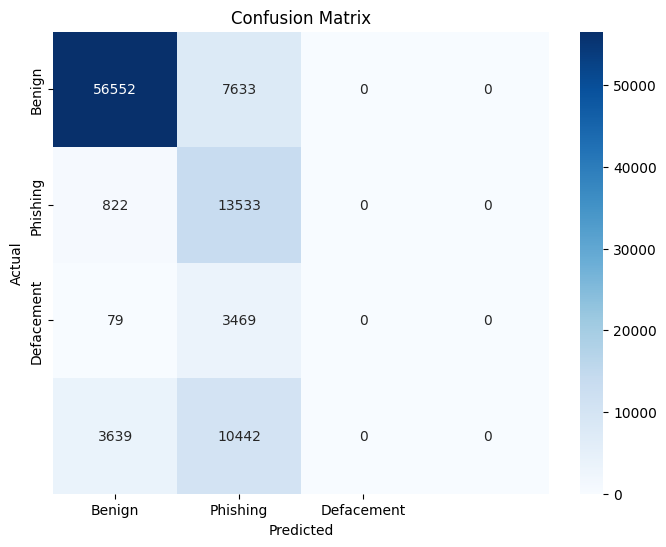

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     64185
           1       0.39      0.94      0.55     14355
           2       0.00      0.00      0.00      3548
           3       0.00      0.00      0.00     14081

    accuracy                           0.73     96169
   macro avg       0.33      0.46      0.36     96169
weighted avg       0.68      0.73      0.68     96169



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict and visualize confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Adjust threshold as needed
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Phishing', 'Defacement'], yticklabels=['Benign', 'Phishing', 'Defacement'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

# Transformer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, Model
from tensorflow.keras import Sequential

file_path = "updated_dataset.csv"
data = pd.read_csv(file_path)

# Balance the dataset
minority_size = min(data['type'].value_counts())
balanced_data = pd.concat([
    resample(data[data['type'] == 0], replace=False, n_samples=minority_size, random_state=42),
    data[data['type'] == 1],
    data[data['type'] == 2],
    data[data['type'] == 3]
])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
X = balanced_data.drop(columns=['url', 'type']).values

input_dim=X.shape[1]
X = X.astype(int)
X = np.clip(X, 0, input_dim)

y = to_categorical(balanced_data['type'].values, num_classes=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def build_transformer_model(input_dim, embed_dim, num_heads, ff_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Embedding(input_dim=input_dim + 1, output_dim=embed_dim)(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(4, activation="softmax")(x)  # 4 output classes

    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model


# Model parameters
input_dim = X_train.shape[1]  # Number of features
embed_dim = 32                # Embedding size
num_heads = 2                 # Number of attention heads
ff_dim = 64                   # Feedforward network size

model = build_transformer_model(input_dim, embed_dim, num_heads, ff_dim)
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 21, 32)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_1                  │ (None, 21, 32)              │          12,736 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,572 (53.02 KB)

 Trainable params: 13,572 (53.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4734/4734 - 60s - 13ms/step - accuracy: 0.7787 - loss: 0.5766 - val_accuracy: 0.8109 - val_loss: 0.4998
Epoch 2/10
4734/4734 - 81s - 17ms/step - accuracy: 0.8060 - loss: 0.5135 - val_accuracy: 0.8165 - val_loss: 0.4845
Epoch 3/10
4734/4734 - 83s - 18ms/step - accuracy: 0.8135 - loss: 0.4939 - val_accuracy: 0.8233 - val_loss: 0.4715
Epoch 4/10
4734/4734 - 56s - 12ms/step - accuracy: 0.8192 - loss: 0.4800 - val_accuracy: 0.8305 - val_loss: 0.4536
Epoch 5/10
4734/4734 - 56s - 12ms/step - accuracy: 0.8235 - loss: 0.4691 - val_accuracy: 0.8348 - val_loss: 0.4504
Epoch 6/10
4734/4734 - 56s - 12ms/step - accuracy: 0.8267 - loss: 0.4605 - val_accuracy: 0.8353 - val_loss: 0.4527
Epoch 7/10
4734/4734 - 83s - 17ms/step - accuracy: 0.8294 - loss: 0.4544 - val_accuracy: 0.8359 - val_loss: 0.4390
Epoch 8/10
4734/4734 - 87s - 18ms/step - accuracy: 0.8320 - loss: 0.4488 - val_accuracy: 0.8383 - val_loss: 0.4344
Epoch 9/10
4734/4734 - 77s - 16ms/step - accuracy: 0.8325 - loss: 0.4453 - val_a

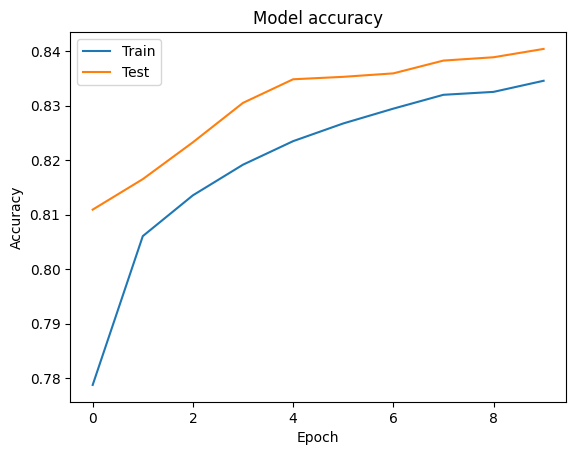

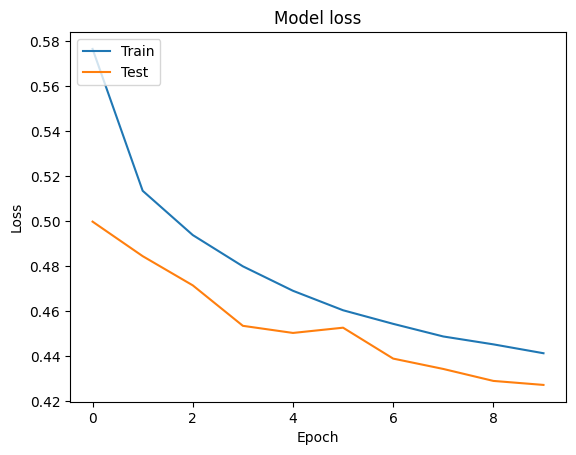

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_history(history)


1480/1480 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step


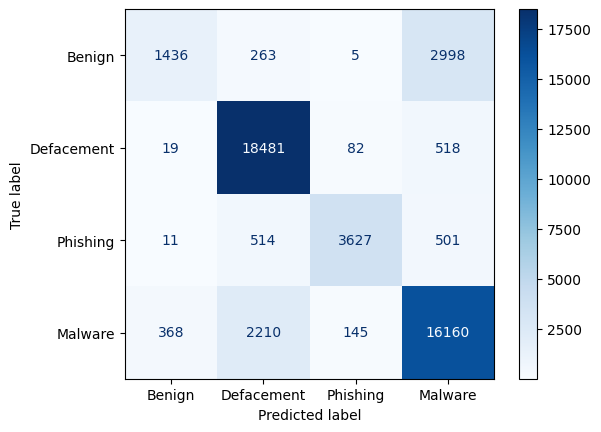

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Defacement', 'Phishing', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# HYBRID MODELS

Cleaning and preprocessing the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

X = dataset.drop(columns=["url", "type"])  # Dropping the 'url' column
y = dataset["type"]

# Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# preliminary Random Forest model for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model performance
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importances.head()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     85191
           1       0.99      1.00      0.99     85613
           2       0.99      0.97      0.98     85785
           3       0.88      0.88      0.88     85875

    accuracy                           0.94    342464
   macro avg       0.94      0.94      0.94    342464
weighted avg       0.94      0.94      0.94    342464



,Feature,Importance
18,first_directory_length,0.142459
20,url_entropy,0.139457
17,hostname_length,0.111046
16,url_length,0.106843
3,count_dots,0.078462


## Step 1: Select the Top Features

In [ ]:
# Select the top N features (e.g., top 5 for simplicity)
top_features = feature_importances["Feature"].head(5).values
X_selected = dataset[top_features]

# features using SMOTE
X_resampled_selected, y_resampled = smote.fit_resample(X_selected, y)

X_scaled_selected = scaler.fit_transform(X_resampled_selected)


##Step 2: Train-Test Split for the Hybrid Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_selected, y_resampled, test_size=0.2, random_state=42
)

## Step 3: Define and Train an MLP Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

mlp_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(set(y)), activation='softmax')
])

mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.7472 - loss: 0.6073 - val_accuracy: 0.7890 - val_loss: 0.4920
Epoch 2/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.7809 - loss: 0.5161 - val_accuracy: 0.7973 - val_loss: 0.4637
Epoch 3/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.7885 - loss: 0.4978 - val_accuracy: 0.8025 - val_loss: 0.4579
Epoch 4/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.7896 - loss: 0.4928 - val_accuracy: 0.8183 - val_loss: 0.4300
Epoch 5/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.7943 - loss: 0.4823 - val_accuracy: 0.8022 - val_loss: 0.4568
Epoch 6/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.7926 - loss: 0.4839 - val_accuracy: 0.8053 - val_loss: 0.4540
Epoch 7/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.7937 - loss: 0.4818 - val_accuracy: 0.7783 - val_loss: 0.4856
Epoch 8/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Generate predictions and the classification report
from sklearn.metrics import classification_report

mlp_preds = mlp_model.predict(X_test)
mlp_preds_classes = mlp_preds.argmax(axis=1)  # Convert probabilities to class labels

print("MLP Model Classification Report:")
print(classification_report(y_test, mlp_preds_classes))



10702/10702 - 15s - 1ms/step - accuracy: 0.8196 - loss: 0.4330
Test Accuracy: 0.82
Test Loss: 0.43
10702/10702 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
MLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79     85191
           1       0.84      0.95      0.89     85613
           2       0.95      0.86      0.91     85785
           3       0.70      0.70      0.70     85875

    accuracy                           0.82    342464
   macro avg       0.82      0.82      0.82    342464
weighted avg       0.82      0.82      0.82    342464



## Optimize the Model

In [ ]:
from tensorflow.keras.regularizers import l2

mlp_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(len(set(y)), activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Learning Rate Tuning:

In [ ]:
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Compile the model
mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
    metrics=['accuracy']
)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# Train the model
mlp_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[lr_scheduler]
)


Epoch 1/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.7128 - loss: 0.8303 - val_accuracy: 0.7446 - val_loss: 0.7036 - learning_rate: 0.0010
Epoch 2/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.7341 - loss: 0.7231 - val_accuracy: 0.7512 - val_loss: 0.6848 - learning_rate: 0.0010
Epoch 3/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - accuracy: 0.7374 - loss: 0.7086 - val_accuracy: 0.7577 - val_loss: 0.6664 - learning_rate: 0.0010
Epoch 4/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 130s 2ms/step - accuracy: 0.7399 - loss: 0.7018 - val_accuracy: 0.7615 - val_loss: 0.6665 - learning_rate: 0.0010
Epoch 5/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.7411 - loss: 0.6964 - val_accuracy: 0.7529 - val_loss: 0.6735 - learning_rate: 0.0010
Epoch 6/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.7415 - loss: 0.6932 - val_accuracy: 0.7394 - val_loss: 0.6744 - learning_rate: 0.0010
Epoch 7/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


10702/10702 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7626 - loss: 0.6398
Test Loss: 0.6399333477020264
Test Accuracy: 0.7626932859420776


10702/10702 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70     85191
           1       0.77      0.94      0.85     85613
           2       0.90      0.83      0.86     85785
           3       0.62      0.65      0.63     85875

    accuracy                           0.76    342464
   macro avg       0.77      0.76      0.76    342464
weighted avg       0.77      0.76      0.76    342464



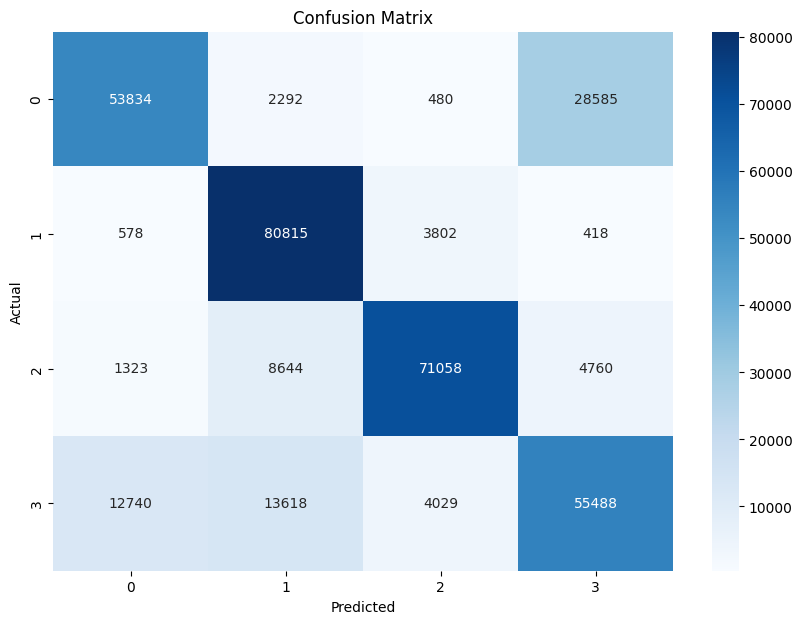

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
!pip install tensorflow
!pip install scikit-learn


In [ ]:
!pip install scikeras


In [ ]:
from scikeras.wrappers import KerasClassifier


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming 'dataset' is already loaded
X = dataset.drop(columns=["url", "type"])  # Dropping the 'url' column
y = dataset["type"]  # Target variable

# Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Define a simple MLP model
def create_mlp():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(len(set(y)), activation='softmax')  # Multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the MLP classifier
mlp_model = KerasClassifier(build_fn=create_mlp, epochs=10, batch_size=32, verbose=0)

# Define the base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('mlp', mlp_model)],
    final_estimator=LogisticRegression()  # You can use any model for the final classifier
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     85191
           1       0.99      0.99      0.99     85613
           2       0.99      0.97      0.98     85785
           3       0.88      0.89      0.88     85875

    accuracy                           0.94    342464
   macro avg       0.94      0.94      0.94    342464
weighted avg       0.94      0.94      0.94    342464



# CNN XG-BOOST

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 195s 6ms/step - accuracy: 0.3701 - loss: 2.7456 - val_accuracy: 0.2497 - val_loss: 3.4654
Epoch 2/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 201s 6ms/step - accuracy: 0.2502 - loss: 3.4657 - val_accuracy: 0.2497 - val_loss: 3.4654
Epoch 3/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 211s 6ms/step - accuracy: 0.2502 - loss: 3.4657 - val_accuracy: 0.2497 - val_loss: 3.4654
Epoch 4/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 209s 6ms/step - accuracy: 0.2507 - loss: 3.4657 - val_accuracy: 0.2497 - val_loss: 3.4654
Epoch 5/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 244s 6ms/step - accuracy: 0.2502 - loss: 3.4657 - val_accuracy: 0.2497 - val_loss: 3.4654
Epoch 6/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 188s 5ms/step - accuracy: 0.2506 - loss: 3.4657 - val_accuracy: 0.2497 - val_loss: 3.4654
Epoch 7/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 217s 6ms/step - accuracy: 0.2503 - loss: 3.4657 - val_accuracy: 0.2497 - val_loss: 3.4654
Epoch 8/10
34247/34247 ━━━━━━━━━━━━━━━━━━━━ 245s 6ms/step - ac

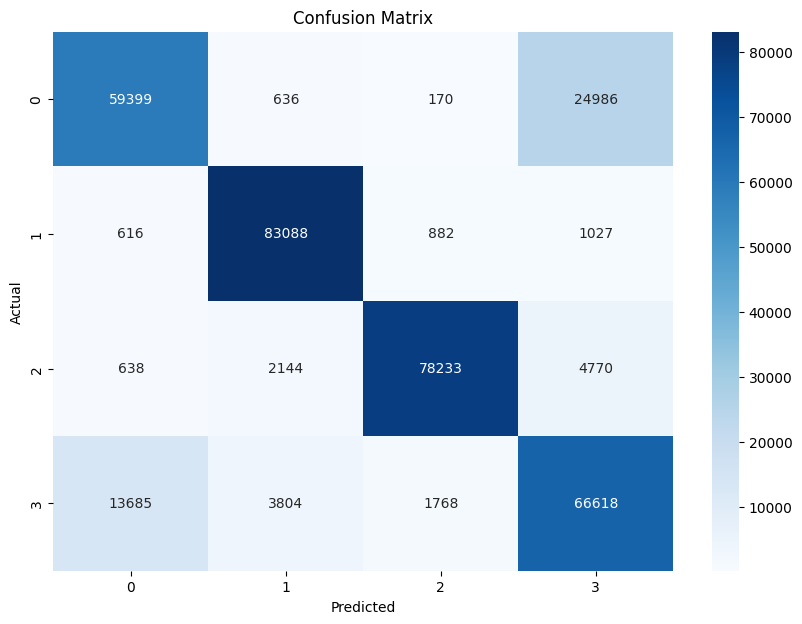

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from xgboost import XGBClassifier

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Reshape the data for CNN (required 3D shape)
X_scaled_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_reshaped, y_resampled, test_size=0.2, random_state=42
)

# Define the CNN model for feature extraction
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu')
])

# Compile the CNN
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Extract features from the trained CNN (remove final dense layers)
cnn_feature_extractor = Sequential(cnn_model.layers[:-1])  # Remove final layer
cnn_feature_extractor.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Extract CNN features for train and test sets
X_train_features = cnn_feature_extractor.predict(X_train)
X_test_features = cnn_feature_extractor.predict(X_test)

# Train the XGBoost classifier on CNN features
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_features, y_train)

# Evaluate the hybrid model
y_pred = xgb_model.predict(X_test_features)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Final Model Evaluations 🥉

In [92]:
import pandas as pd

model_accuracies = {
    'Model': ['Random Forest', 'Logistic Regression', 'MLP', 'CNN', 'XGBoost', 'Decision Trees' , 'RNN', 'RasNet', 'LSTM', 'Transformer', 'Hybrid (MLP + XGBoost )', 'Hybrid ( CNN + XGBoost )'],
    'Accuracy': [0.9209358549424839, 0.847096899980503, 0.9162799766036265, 0.4877, 0.9190173523103919, 0.9037551179567167 ,0.8808, 0.7676078081130981, 0.7318, 0.8387, 0.95, 0.84]
}

df_accuracies = pd.DataFrame(model_accuracies)

print(df_accuracies)


                       Model  Accuracy
0              Random Forest  0.920936
1        Logistic Regression  0.847097
2                        MLP  0.916280
3                        CNN  0.487700
4                    XGBoost  0.919017
5             Decision Trees  0.903755
6                        RNN  0.880800
7                     RasNet  0.767608
8                       LSTM  0.731800
9                Transformer  0.838700
10   Hybrid (MLP + XGBoost )  0.950000
11  Hybrid ( CNN + XGBoost )  0.840000
